In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [18]:
train=pd.read_csv('H:/Top Mentor Course/Sql Assignment/Assignments/Health Insurance Prediction/train.csv')
test=pd.read_csv('H:/Top Mentor Course/Sql Assignment/Assignments/Health Insurance Prediction/test.csv')

In [19]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [20]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


# Checking for Duplicate Data

In [27]:
train[train.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


# Checking for Null Values:

In [28]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Label Encoding
We replaced some values in the data sets with numerical values, as follows ;
Vehicle Age ->
“<1 Year” = 0
“1–2 Year” = 1
“>2 Year” = 2
Gender ->
“Female” = 0
“Male” = 1
Vehicle Damage ->
“No” = 0
“Yes” = 1

In [33]:
train['Vehicle_Age']=train['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
train['Gender']=train['Gender'].replace({'Male':1,'Female':0})
train['Vehicle_Damage']=train['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [67]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [60]:
test['Vehicle_Age']=test['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
test['Gender']=test['Gender'].replace({'Male':1,'Female':0})
test['Vehicle_Damage']=test['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [61]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,0,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,0,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,0,0,59097.0,152.0,297


# Correlation

<Axes: >

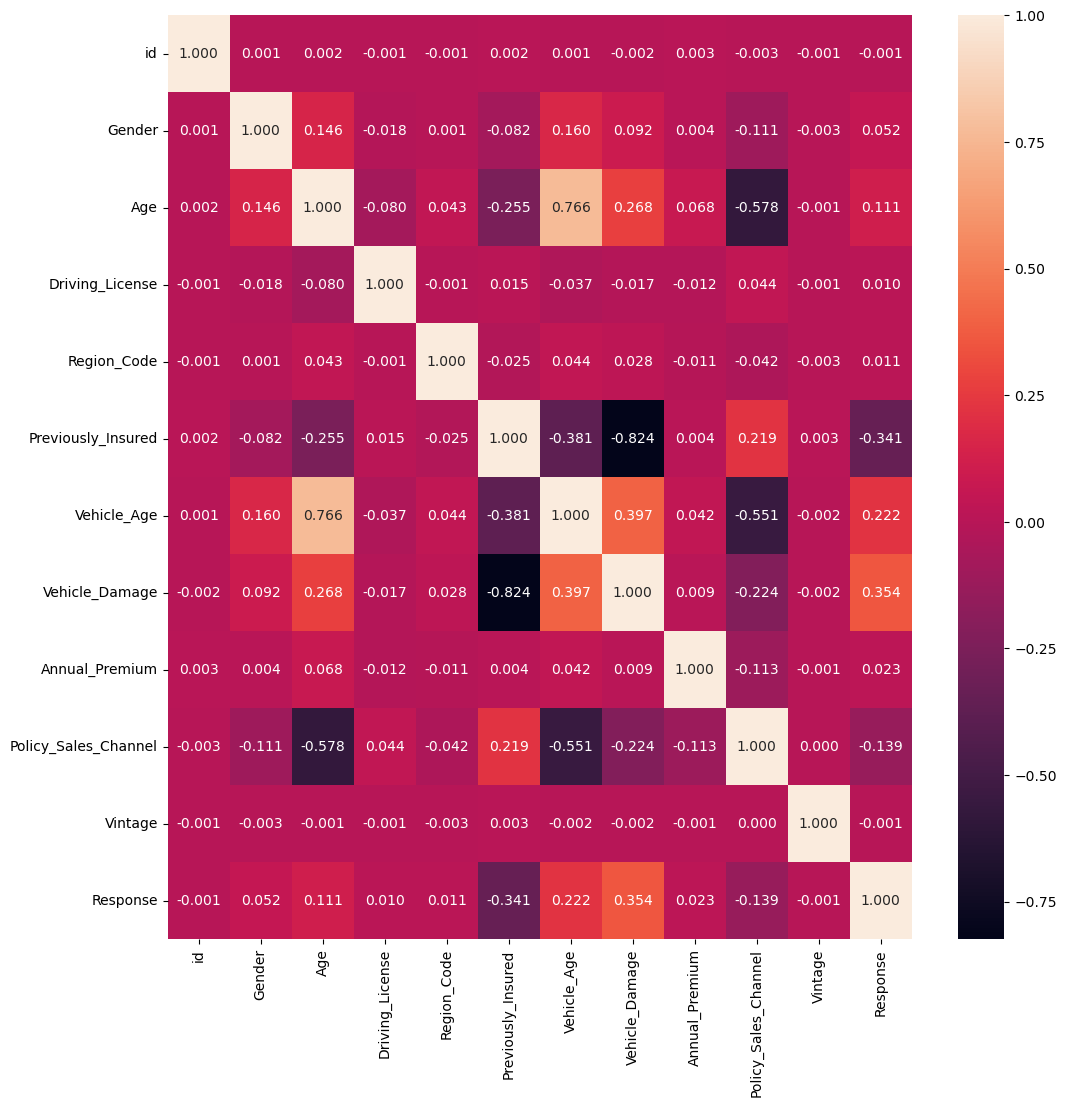

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True, fmt=".3f")

# An Overview Of The Data Set

<Axes: ylabel='count'>

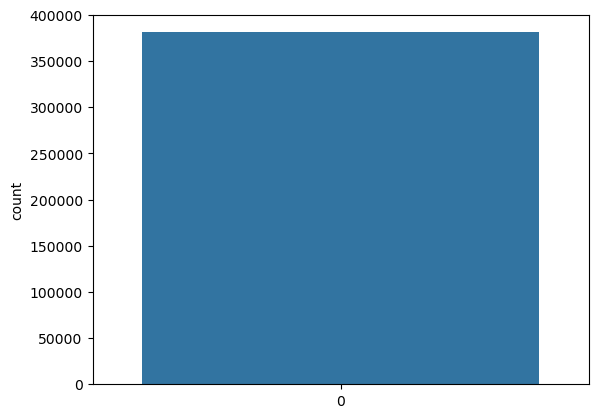

In [73]:
sns.countplot(train.Response)

In [43]:
count_1=train[train["Response"]==1].value_counts().sum()
totalResponse = train["Response"].value_counts().sum()
print("The percentage of postive response in train data is:",round(count_1*100/totalResponse),"%")

The percentage of postive response in train data is: 12 %


In [74]:
train.groupby(['Response','Vehicle_Age','Vehicle_Damage']).size()

Response  Vehicle_Age  Vehicle_Damage
0         0            0                 116204
                       1                  41380
          1            0                  71495
                       1                  94015
          2            0                     15
                       1                  11290
1         0            0                    386
                       1                   6816
          1            0                    596
                       1                  34210
          2            1                   4702
dtype: int64

Most of the vehicles of customers with response 1 are between the ages of 1-2 and their vehicles are damaged.

<Axes: xlabel='Previously_Insured', ylabel='count'>

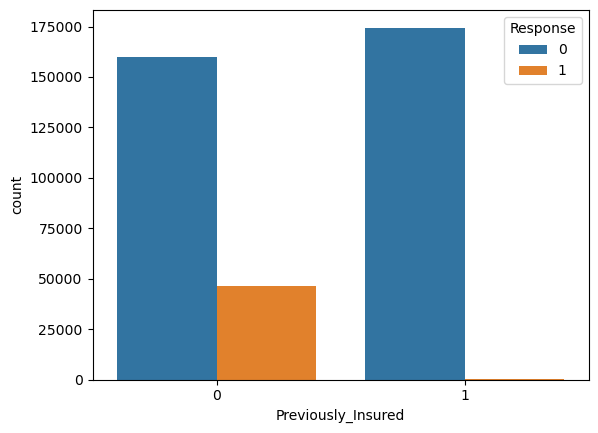

In [75]:
sns.countplot(x='Previously_Insured',data=train,hue='Response')

Customers who were previously insured tend not to be interested. We can think that the reason for this is that their previous insurance agreement has not expired yet.

In [76]:
print("Most used channel:")
print((train['Policy_Sales_Channel'].value_counts()))

Most used channel:
152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
149.0         1
43.0          1
144.0         1
143.0         1
41.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64


C:\Users\ASHISH\AppData\Local\Temp\ipykernel_2432\1878255771.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(psc_notinterested)


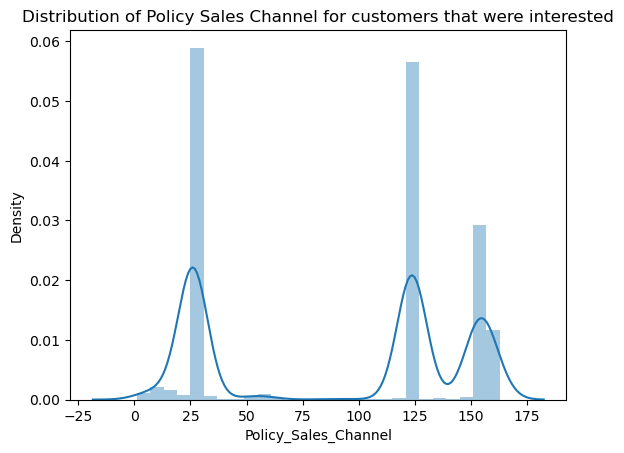

In [77]:
psc_notinterested=(train.loc[train['Response'][train['Response']==1].index.values])['Policy_Sales_Channel']
sns.distplot(psc_notinterested)
plt.title("Distribution of Policy Sales Channel for customers that were interested")
plt.show()

The most used sales channels are 152, 26 and 124. The best channel that results in customer interest is 152.

# Model Building - DecisionTreeClassifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

First, I delete the "id" column as it will not contribute to model training.

In [83]:
train.drop(columns="id", inplace=True, errors="ignore")

I define the "Response" column to y and the other columns to X.

In [84]:
X = train[train.columns[:-1]]
y = train[train.columns[-1]]

We will divide our data into 4 variables; The x_train and y_train variables for training, x_test and y_test variables to test the model at the end of the training.

The test_size parameter specifies what percentage of the data set should be reserved for testing.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
Let's divide our data into 5 clusters with the K-Means algorithm.

In [86]:
k_means = KMeans(n_clusters = 5,init='k-means++',random_state=0) 
clusters = k_means.fit(X) 
X['clusters'] = clusters.labels_

C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
k_means.labels_

array([0, 3, 0, ..., 3, 0, 0])

In [89]:
fig=px.bar(X.groupby('clusters').count().reset_index(),x='clusters',y='Gender')
fig.show()

In [ ]:
We see that most of the customers are gathered in cluster 2.

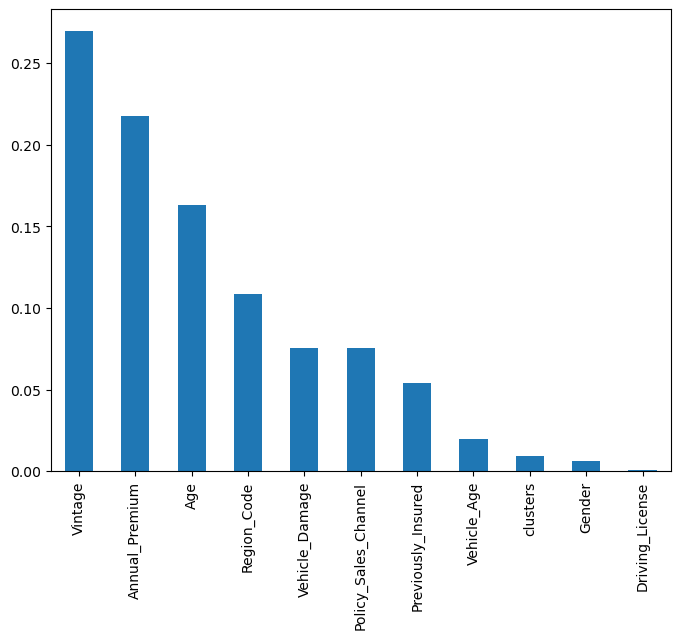

In [91]:
cluster_2 = X[X['clusters']== 2]
cluster_2
model = ExtraTreesClassifier()
model.fit(X,y)
plt.figure(figsize=(8,6))
important_features = pd.Series(model.feature_importances_,index = cluster_2.columns)
important_features.nlargest(11).plot(kind = "bar")
plt.show()

I choose customers in cluster 2 and used ExtraTreesClassifier () to find the most important features. So we can have an idea why customers are gathering more in cluster 2.

In [92]:
#Creating a Model
tree_classifier = DecisionTreeClassifier()
#Building a relationship by looking at x_train and y_train data
tree_classifier.fit(X_train, y_train) 

DecisionTreeClassifier()

In [93]:
predictions = tree_classifier.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [94]:
plot_confusion_matrix(tree_classifier,X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

accuracy_score = Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.

In [111]:
accuracy_score(y_test, predictions)

0.8220461284143685

Precision_score = It shows how many of the values we guess as Positive are actually Positive.

In [112]:
precision_score(y_test, predictions)

0.2955993930197269

recall_score = It is a metric that shows how many of the operations we need to predict positive.

In [113]:
recall_score(y_test, predictions)

0.3068360810668907

f1_score = The F1 Score value shows us the harmonic mean of the Precision and Recall values.

In [114]:
f1_score(y_test, predictions)


0.30111294311624076

# RandomForestClassifier

RandomForestClassifier generate multiple decision trees. When it will produce a result, the average value in these decision trees is taken and the result is produced.

In [130]:
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [117]:
rf_predictions = rf_classifier.predict(X_test)
rf_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [119]:
accuracy_score(y_test,rf_predictions), precision_score(y_test,rf_predictions), recall_score(y_test,rf_predictions), f1_score(y_test, rf_predictions)

(0.8653013565637218,
 0.37673956262425445,
 0.11939514858762995,
 0.1813252531696037)

# KNeighborsClassifier

In [120]:
KNN = KNeighborsClassifier(n_neighbors=11, metric='minkowski', p = 2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [121]:
KNN_predictions = KNN.predict(X_test)
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
accuracy_score(y_test,KNN_predictions), precision_score(y_test,KNN_predictions), recall_score(y_test,KNN_predictions), f1_score(y_test,KNN_predictions)

(0.8713625987247776,
 0.2235294117647059,
 0.011971017536490602,
 0.022725007475331405)

# BaggingClassifier

In [123]:
b_classifier = BaggingClassifier()
b_classifier.fit(X_train, y_train)

BaggingClassifier()

In [124]:
b_predictions = b_classifier.predict(X_test)
b_predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
accuracy_score(y_test,b_predictions), precision_score(y_test,b_predictions), recall_score(y_test,b_predictions), f1_score(y_test,b_predictions)

(0.860433995434389,
 0.3534052064159874,
 0.14113199621967867,
 0.20171094101755968)

Compare the accuracy scores in all the models :

In [126]:
print("DecisionTreeClassifier Accuracy = ",accuracy_score(y_test, predictions))
print("RandomForestClassifier Accuracy = ",accuracy_score(y_test,rf_predictions))
print("KNeighborsClassifier Accuracy = ",accuracy_score(y_test,KNN_predictions))
print("BaggingClassifier Accuracy = ",accuracy_score(y_test,b_predictions))

DecisionTreeClassifier Accuracy =  0.8220461284143685
RandomForestClassifier Accuracy =  0.8653013565637218
KNeighborsClassifier Accuracy =  0.8713625987247776
BaggingClassifier Accuracy =  0.860433995434389


# File submission

In [127]:
responses = KNN.predict(test[test.columns[1:]])

In [129]:
submission = pd.DataFrame(data = {'id': test['id'], 'Response': responses})
submission.to_csv('submission.csv', index = False)
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
